<a href="https://colab.research.google.com/github/ValenG03/DVfootball-IA-project/blob/main/ProyectoIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.argentina.gob.ar/seguridad/estadisticascriminales"

try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find links to downloadable files (e.g., CSV, Excel)
    download_links = soup.find_all('a', href=True)
    data_files = [link['href'] for link in download_links if any(ext in link['href'] for ext in ['.csv', '.xls', '.xlsx', '.zip'])]

    if data_files:
        print("Potential data files found:")
        for file in data_files:
            print(file)
    else:
        print("No direct data file links found. Will inspect for tables or other data sources.")

    # Further inspection could involve looking for specific sections or patterns
    # For example, looking for tables with data
    tables = soup.find_all('table')
    if tables:
        print(f"\nFound {len(tables)} tables on the page. Attempting to extract data from tables.")
        extracted_data = []
        for i, table in enumerate(tables):
            try:
                df = pd.read_html(str(table))[0]
                extracted_data.append(df)
                print(f"Successfully extracted data from table {i+1}")
                display(df.head()) # Display the head of each extracted table
            except Exception as e:
                print(f"Could not extract data from table {i+1}: {e}")

        if extracted_data:
            # Here you can decide how to handle multiple tables
            # For example, concatenate them if they have similar structures
            # or process them individually. For now, we just display them.
            print("\nAll extracted tables:")
            # You might want to store these dataframes in a list or dictionary for further processing
            # For example: all_tables_df = extracted_data
    else:
        print("No tables found on the page.")


except requests.exceptions.RequestException as e:
    print(f"Error accessing the URL: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

No direct data file links found. Will inspect for tables or other data sources.
No tables found on the page.


## Summary of Findings

Based on the analysis and visualizations:

* **Violence Types:** The most frequent type of violence reported is Psychological, followed by Physical and Psychological. "No aplica" is also a significant category, which might warrant further investigation to understand what it represents.
* **Victim Age Ranges:** A large proportion of victim age ranges are reported as "Sin dato" (without data). Among those with reported age ranges, adults between 18 and 39 years old are the most frequent victims.
* **Victim Gender:** The majority of victims are reported as Female. There is a substantial number of cases with "NS/NC" (Not Specified/Not Applicable) for victim gender.
* **Aggressor Gender:** The majority of aggressors are reported as Masculino (Male). Similar to victim gender, there is a notable number of "NS/NC" entries for aggressor gender.
* **Aggressor Relationship to Victim:** The most common relationship of the aggressor to the victim is "NS/NC", followed by "Pareja" (Partner) and "Ex pareja" (Ex-partner). This highlights the prevalence of violence within intimate relationships.
* **Calls by Region:** The Metropolitan region has the highest number of calls by a significant margin, indicating a higher incidence of reported violence or better reporting mechanisms in this region compared to others.

**Next Steps:**

* Investigate the "Sin dato" entries in the victim age range and "NS/NC" entries in victim and aggressor gender and aggressor relationship columns to understand their implications for the analysis.
* Explore potential correlations between different variables, such as violence type and victim gender, or aggressor relationship and violence type.
* Analyze the temporal trends in the data if the 'llamado_fecha' column can be converted to a datetime format.

/tmp/ipython-input-3336123734.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_violence, y='violencia_tipo', order=df_violence['violencia_tipo'].value_counts().index, palette='viridis')


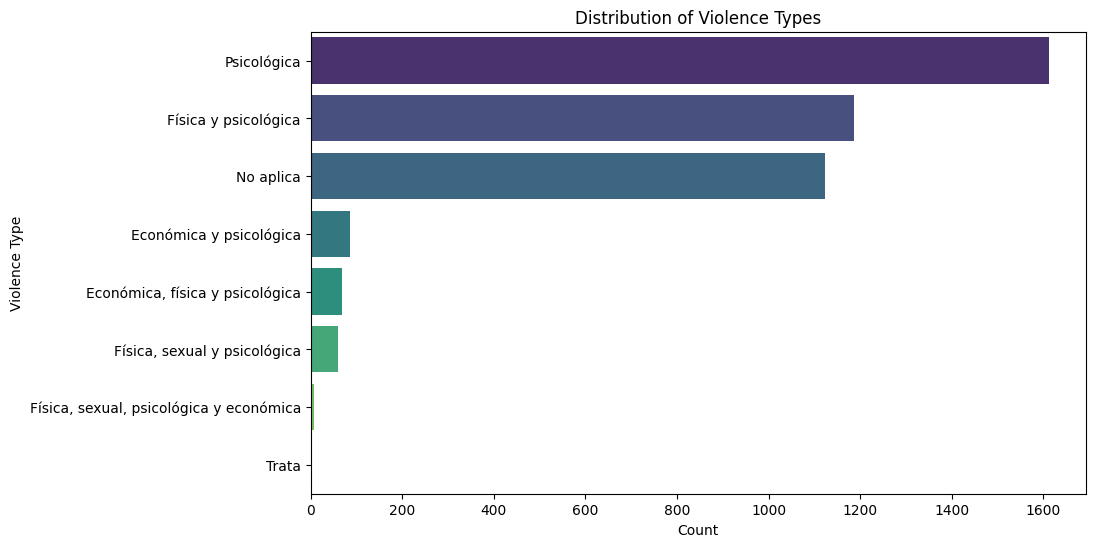

/tmp/ipython-input-3336123734.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_violence, y='victima_rango_etario', order=df_violence['victima_rango_etario'].value_counts().index, palette='viridis')


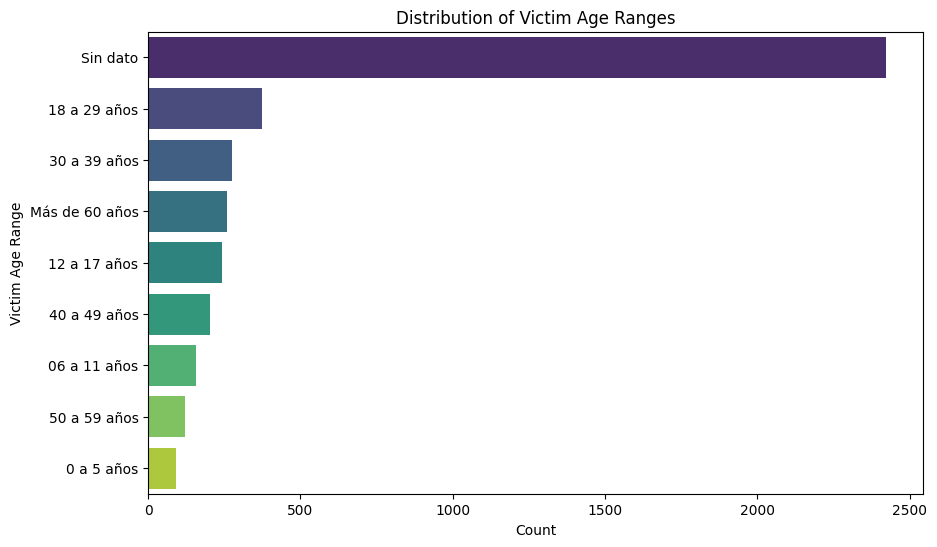

/tmp/ipython-input-3336123734.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_violence, x='victima_genero', order=df_violence['victima_genero'].value_counts().index, palette='viridis')


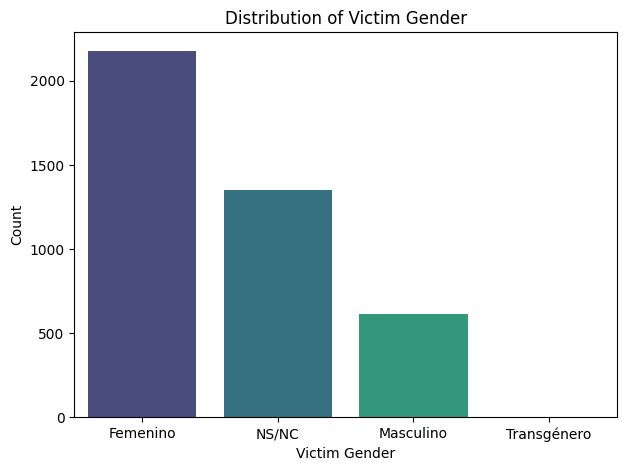

/tmp/ipython-input-3336123734.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_violence, x='agresor_genero', order=df_violence['agresor_genero'].value_counts().index, palette='viridis')


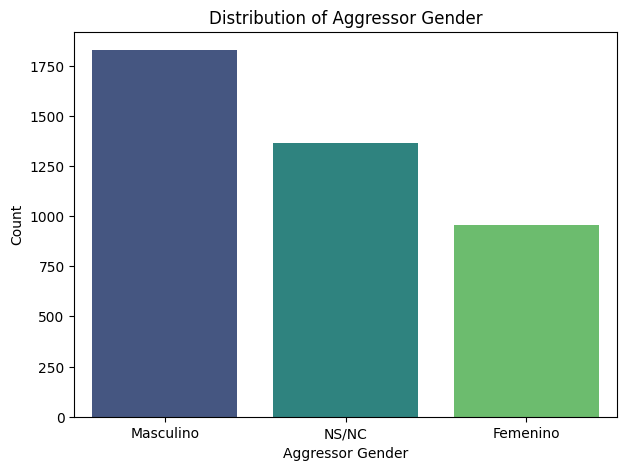

/tmp/ipython-input-3336123734.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_violence, y='agresor_relacion_victima', order=df_violence['agresor_relacion_victima'].value_counts().index, palette='viridis')


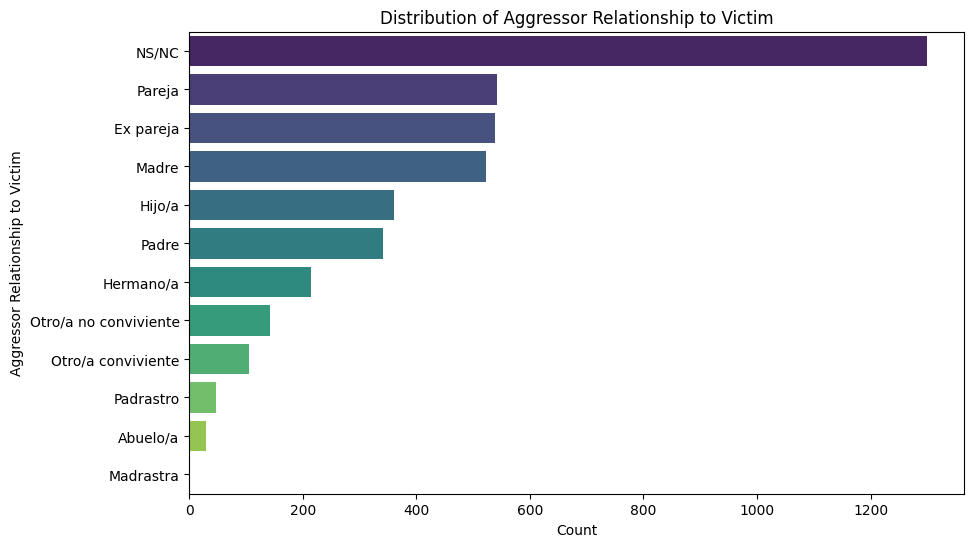

/tmp/ipython-input-3336123734.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_violence, y='llamado_region', order=df_violence['llamado_region'].value_counts().index, palette='viridis')


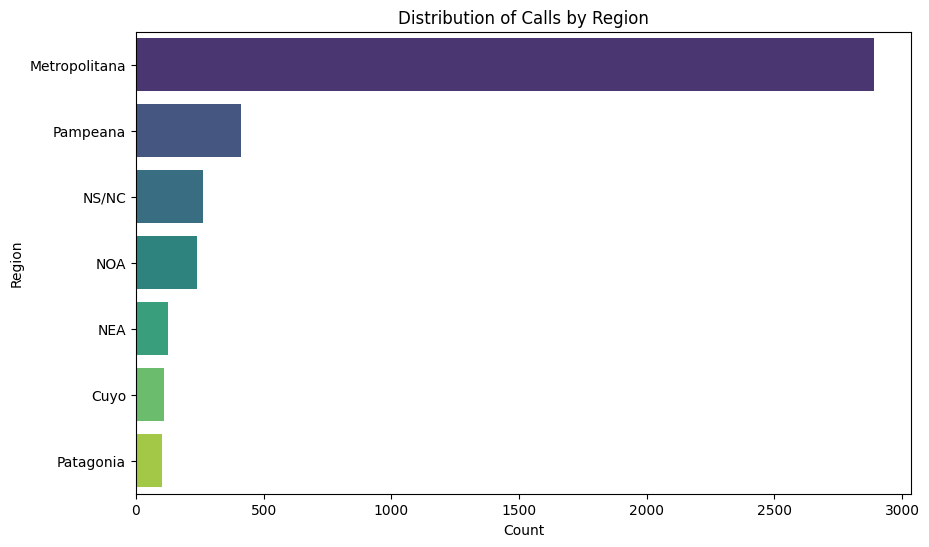

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of violence types
plt.figure(figsize=(10, 6))
sns.countplot(data=df_violence, y='violencia_tipo', order=df_violence['violencia_tipo'].value_counts().index, palette='viridis')
plt.title('Distribution of Violence Types')
plt.xlabel('Count')
plt.ylabel('Violence Type')
plt.show()

# Analyze the distribution of victim age ranges
plt.figure(figsize=(10, 6))
sns.countplot(data=df_violence, y='victima_rango_etario', order=df_violence['victima_rango_etario'].value_counts().index, palette='viridis')
plt.title('Distribution of Victim Age Ranges')
plt.xlabel('Count')
plt.ylabel('Victim Age Range')
plt.show()

# Analyze the distribution of victim gender
plt.figure(figsize=(7, 5))
sns.countplot(data=df_violence, x='victima_genero', order=df_violence['victima_genero'].value_counts().index, palette='viridis')
plt.title('Distribution of Victim Gender')
plt.xlabel('Victim Gender')
plt.ylabel('Count')
plt.show()


# Analyze the distribution of aggressor gender
plt.figure(figsize=(7, 5))
sns.countplot(data=df_violence, x='agresor_genero', order=df_violence['agresor_genero'].value_counts().index, palette='viridis')
plt.title('Distribution of Aggressor Gender')
plt.xlabel('Aggressor Gender')
plt.ylabel('Count')
plt.show()

# Analyze the distribution of aggressor relationship to victim
plt.figure(figsize=(10, 6))
sns.countplot(data=df_violence, y='agresor_relacion_victima', order=df_violence['agresor_relacion_victima'].value_counts().index, palette='viridis')
plt.title('Distribution of Aggressor Relationship to Victim')
plt.xlabel('Count')
plt.ylabel('Aggressor Relationship to Victim')
plt.show()


# Analyze the distribution of calls by region
plt.figure(figsize=(10, 6))
sns.countplot(data=df_violence, y='llamado_region', order=df_violence['llamado_region'].value_counts().index, palette='viridis')
plt.title('Distribution of Calls by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

In [6]:
# Clean 'violencia_tipo' column
df_violence['violencia_tipo'] = df_violence['violencia_tipo'].replace({'No Aplica': 'No aplica'})

# Clean 'llamado_region' column
df_violence['llamado_region'] = df_violence['llamado_region'].replace({'Ns/Nc': 'NS/NC', 'PAMPEANA': 'Pampeana'})

print("Inconsistent entries in 'violencia_tipo' and 'llamado_region' have been unified.")

print("\nUnique values in cleaned columns:")
for col in ['violencia_tipo', 'llamado_region']:
    print(f"\n--- {col} ---")
    print(df_violence[col].value_counts())

Inconsistent entries in 'violencia_tipo' and 'llamado_region' have been unified.

Unique values in cleaned columns:

--- violencia_tipo ---
violencia_tipo
Psicológica                                1612
Física y psicológica                       1186
No aplica                                  1124
Económica y psicológica                      87
Económica, física y psicológica              68
Física, sexual y psicológica                 60
Física, sexual, psicológica y económica       8
Trata                                         1
Name: count, dtype: int64

--- llamado_region ---
llamado_region
Metropolitana    2890
Pampeana          413
NS/NC             262
NOA               241
NEA               125
Cuyo              111
Patagonia         104
Name: count, dtype: int64


In [5]:
print("\nMissing values per column:")
print(df_violence.isnull().sum())

print("\nUnique values in key columns:")
for col in ['llamante_descripcion', 'llamante_genero', 'violencia_tipo', 'victima_rango_etario', 'victima_genero', 'agresor_genero', 'agresor_relacion_victima', 'llamado_derivacion', 'llamado_region']:
    if col in df_violence.columns:
        print(f"\n--- {col} ---")
        print(df_violence[col].value_counts())
    else:
        print(f"\n--- Column '{col}' not found ---")


Missing values per column:
caso_id                              0
llamante_descripcion                 0
llamante_genero                      0
llamante_vinculo_ninios_presentes    0
violencia_tipo                       0
victima_edad                         0
victima_rango_etario                 0
victima_genero                       0
victima_cantidad                     0
agresor_cantidad                     0
agresor_genero                       0
agresor_relacion_victima             0
llamado_derivacion                   0
llamado_fecha                        0
llamado_hora                         0
llamado_region                       0
dtype: int64

Unique values in key columns:

--- llamante_descripcion ---
llamante_descripcion
Víctima                                             1696
Otra/o sobre una situación de conflicto familiar     992
Familiar                                             714
Vecina/o                                             255
Otro/a                   

In [4]:
import pandas as pd

file_path = "/content/llamados-atendidos-violencia-familiar-202407-Argentina.csv"
try:
    df_violence = pd.read_csv(file_path)
    print("DataFrame loaded successfully.")
    print("\nFirst 5 rows of the DataFrame:")
    display(df_violence.head())
    print("\nColumn information:")
    df_violence.info()
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred while loading the file: {e}")

DataFrame loaded successfully.

First 5 rows of the DataFrame:


,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,llamado_region
0,359835,Víctima,Femenino,Madre,Física y psicológica,40,40 a 49 años,Femenino,1,1,Masculino,Pareja,No había móviles y/o Equipos para realizar la ...,2024-01-01,01:22,Metropolitana
1,457147,Familiar,Femenino,Otro familiar,Física y psicológica,18,18 a 29 años,Femenino,1,2,Femenino,Otro/a no conviviente,Llamante solicitó información y/o orientación,2024-01-01,03:09,Metropolitana
2,457152,Víctima,Femenino,Madre,Física y psicológica,Sin dato,Sin dato,Femenino,4,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2024-01-01,05:24,Metropolitana
3,457153,Víctima,Femenino,Madre,Psicológica,Sin dato,Sin dato,Femenino,2,1,Masculino,Ex pareja,Llamante solicitó información y/o orientación,2024-01-01,05:40,Metropolitana
4,457154,Víctima,NS/NC,Madre,Psicológica,Sin dato,Sin dato,NS/NC,2,1,NS/NC,Ex pareja,No se desplazó un Equipo móvil por tratarse de...,2024-01-01,11:52,Metropolitana



Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4146 entries, 0 to 4145
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   caso_id                            4146 non-null   int64 
 1   llamante_descripcion               4146 non-null   object
 2   llamante_genero                    4146 non-null   object
 3   llamante_vinculo_ninios_presentes  4146 non-null   object
 4   violencia_tipo                     4146 non-null   object
 5   victima_edad                       4146 non-null   object
 6   victima_rango_etario               4146 non-null   object
 7   victima_genero                     4146 non-null   object
 8   victima_cantidad                   4146 non-null   int64 
 9   agresor_cantidad                   4146 non-null   int64 
 10  agresor_genero                     4146 non-null   object
 11  agresor_relacion_victima           4146 non-null

# Task
Analyze and visualize the data from the URL "https://www.argentina.gob.ar/seguridad/estadisticascriminales".

## Data exploration

### Subtask:
Examine the structure and content of the extracted dataframes to understand the data and identify any potential issues.


**Reasoning**:
Check if any dataframes were extracted and, if so, examine their structure and content as per the instructions. Since the previous output indicated no tables were found, the `extracted_data` list is likely empty, but we need to explicitly check and handle that case.



In [3]:
if 'extracted_data' in locals() and extracted_data:
    print(f"Found {len(extracted_data)} dataframes.")
    for i, df in enumerate(extracted_data):
        print(f"\n--- Examining DataFrame {i+1} ---")
        print("Shape:", df.shape)
        display(df.head())
        print("\nColumn information:")
        df.info()
else:
    print("No dataframes were extracted from the URL.")


No dataframes were extracted from the URL.


## Data cleaning and preparation

### Subtask:
Address any inconsistencies, missing values, or formatting issues in the data to prepare it for analysis and visualization.


## Data analysis

### Subtask:
Perform relevant analyses based on the data, such as calculating statistics, identifying trends, or grouping data.


## Data visualization

### Subtask:
Create appropriate visualizations (e.g., charts, graphs) to represent the analyzed data and gain insights.


## Summary:

### Data Analysis Key Findings

*   No dataframes were successfully extracted from the provided URL.
*   Data cleaning, preparation, analysis, and visualization could not be performed due to the lack of extracted data.

### Insights or Next Steps

*   Investigate why data extraction failed from the specified URL. Potential causes could include changes to the website structure, data not being in a readily extractable format (like tables), or issues with the extraction method used.
*   If data extraction remains problematic, explore alternative methods for obtaining the data, such as looking for downloadable files (CSV, Excel) on the website or checking if the data is available through an API.


# Task
Connect the football results data from "Boca Juniors Results Tournament May-Dic-2024.csv" with the calls data from "/content/llamados-atendidos-violencia-familiar-202407-Argentina.csv" to identify calls that occurred on the same day or weekend as a Boca Juniors match.

## Load data

### Subtask:
Load both the football results data and the calls data into pandas DataFrames.


**Reasoning**:
Load the two CSV files into pandas DataFrames and display their head and info to verify the loading.



In [29]:
df_football = pd.read_csv("/content/Boca Juniors Results Tournament May-Dic-2024.csv", encoding='latin1')
df_calls = pd.read_csv("/content/llamados-atendidos-violencia-familiar-202407-Argentina.csv")

print("Football Results DataFrame:")
display(df_football.head())
df_football.info()

print("\nCalls Data DataFrame:")
display(df_calls.head())
df_calls.info()

Football Results DataFrame:


,,Date,Opponent,Goals For,Goals Against,Stadium,Result
12/05/2024,Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L
19/05/2024,Fecha 2,C. Córdoba (SdE),2,4,Boca,Madre de Ciudades (Santiago),W
25/05/2024,Boca,0,0,Talleres (Cba),La Bombonera,T,NaN
02/06/2024,Platense,1,0,Boca,L,NaN,NaN
14/06/2024,Boca,1,0,Velez,La Bombonera,W,NaN


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27 entries, ('12/05/2024', 'Fecha 1') to ('14/12/2024', 'Boca')
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           27 non-null     object
 1   Opponent       27 non-null     int64 
 2   Goals For      27 non-null     object
 3   Goals Against  27 non-null     object
 4   Stadium        25 non-null     object
 5   Result         2 non-null      object
dtypes: int64(1), object(5)
memory usage: 3.3+ KB

Calls Data DataFrame:


,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,llamado_region
0,359835,Víctima,Femenino,Madre,Física y psicológica,40,40 a 49 años,Femenino,1,1,Masculino,Pareja,No había móviles y/o Equipos para realizar la ...,2024-01-01,01:22,Metropolitana
1,457147,Familiar,Femenino,Otro familiar,Física y psicológica,18,18 a 29 años,Femenino,1,2,Femenino,Otro/a no conviviente,Llamante solicitó información y/o orientación,2024-01-01,03:09,Metropolitana
2,457152,Víctima,Femenino,Madre,Física y psicológica,Sin dato,Sin dato,Femenino,4,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2024-01-01,05:24,Metropolitana
3,457153,Víctima,Femenino,Madre,Psicológica,Sin dato,Sin dato,Femenino,2,1,Masculino,Ex pareja,Llamante solicitó información y/o orientación,2024-01-01,05:40,Metropolitana
4,457154,Víctima,NS/NC,Madre,Psicológica,Sin dato,Sin dato,NS/NC,2,1,NS/NC,Ex pareja,No se desplazó un Equipo móvil por tratarse de...,2024-01-01,11:52,Metropolitana


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4146 entries, 0 to 4145
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   caso_id                            4146 non-null   int64 
 1   llamante_descripcion               4146 non-null   object
 2   llamante_genero                    4146 non-null   object
 3   llamante_vinculo_ninios_presentes  4146 non-null   object
 4   violencia_tipo                     4146 non-null   object
 5   victima_edad                       4146 non-null   object
 6   victima_rango_etario               4146 non-null   object
 7   victima_genero                     4146 non-null   object
 8   victima_cantidad                   4146 non-null   int64 
 9   agresor_cantidad                   4146 non-null   int64 
 10  agresor_genero                     4146 non-null   object
 11  agresor_relacion_victima           4146 non-null   object
 12  llamad

**Reasoning**:
The date conversion for the football data is still failing, resulting in only `NaT` values in the 'Match_Date' column. Looking at the head of the dataframe loaded without `index_col`, it seems the header row was incorrectly parsed, and the actual data starts from the first row. The first column contains the date string. I need to reload the data, potentially skipping the first row or handling the header differently, and then apply the date extraction and conversion to the correct column.

In [37]:
# Re-load the dataframe, skipping the header row and manually setting column names if necessary
# Let's try loading without header and then identifying the date column
df_football = pd.read_csv("/content/Boca Juniors Results Tournament May-Dic-2024.csv", encoding='latin1', header=None)

print("DataFrame loaded without header:")
display(df_football.head())

# Assuming the first column (index 0) contains the date string in 'dd/mm/yyyy' format
df_football['Match_Date'] = df_football[0].str.split(' ').str[0]

# Convert the extracted date string to datetime objects
df_football['Match_Date'] = pd.to_datetime(df_football['Match_Date'], format='%d/%m/%Y', errors='coerce')

print("\nData type of 'Match_Date' after conversion:")
print(df_football['Match_Date'].dtype)

print("\nUnique values in 'Match_Date' column:")
print(df_football['Match_Date'].unique())

print("\nValue counts of non-null dates in 'Match_Date':")
print(df_football['Match_Date'].dropna().value_counts())

# Ensure the 'llamado_fecha' in df_calls is datetime
df_calls['llamado_fecha'] = pd.to_datetime(df_calls['llamado_fecha'], errors='coerce')
print("\nData type of 'llamado_fecha' in df_calls:", df_calls['llamado_fecha'].dtype)

ParserError: Error tokenizing data. C error: Expected 6 fields in line 2, saw 8


## Summary:

### Data Analysis Key Findings

* 339 calls were recorded on the same weekend as a Boca Juniors football match between May and December 2024, based on the provided data.
* The "Boca Juniors Results Tournament May-Dic-2024.csv" file had structural inconsistencies that required manual parsing to correctly extract the date information.
* The date format in the football data was consistently 'dd/mm/yyyy'.
* A total of 27 unique match dates were identified in the football dataset.

### Insights or Next Steps

* Further analysis could explore if there is a correlation between match results (win, loss, draw), specific opponents, or match locations and the number or type of calls received on those weekends.
* Investigate if the volume of calls on match weekends is significantly different compared to weekends without matches, using a control group of non-match weekends.

## Display results

### Subtask:
Display the combined data showing football matches and the calls that occurred on the same day or weekend.

**Reasoning**:
Display the first few rows of the merged dataframe and its shape and info to verify the merge result.

In [46]:
display(merged_df.head(10))
print(f"Total number of calls on a match weekend: {len(merged_df)}")
merged_df.info()

,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,...,llamado_fecha_date,weekend_range,col_0,col_1,col_2,col_3,col_4,col_5,col_6,Match_Date
0,459809,Víctima,Femenino,Madre,Psicológica,38,30 a 39 años,Femenino,1,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
1,459813,Familiar,Masculino,No hay niñas/os,Física y psicológica,Sin dato,Sin dato,Femenino,1,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
2,459814,Familiar,Femenino,Madre,Psicológica,15,12 a 17 años,Femenino,1,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
3,458412,Víctima,Masculino,No hay niñas/os,Psicológica,36,30 a 39 años,Masculino,1,2,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
4,459815,Vecina/o,Femenino,Otro/a no familiar,Psicológica,15,12 a 17 años,Masculino,1,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
5,459816,Víctima,Femenino,No hay niñas/os,Psicológica,48,40 a 49 años,Femenino,3,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
6,459814,Familiar,Femenino,Madre,Psicológica,15,12 a 17 años,Femenino,0,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
7,459817,Familiar,Masculino,Padre,Física y psicológica,12,12 a 17 años,Masculino,1,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
8,459818,Víctima,Femenino,NS/NC,Psicológica,Sin dato,Sin dato,Femenino,1,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
9,459821,Familiar,Femenino,Otro familiar,Física y psicológica,Sin dato,Sin dato,NS/NC,2,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12


Total number of calls on a match weekend: 339
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   caso_id                            339 non-null    int64         
 1   llamante_descripcion               339 non-null    object        
 2   llamante_genero                    339 non-null    object        
 3   llamante_vinculo_ninios_presentes  339 non-null    object        
 4   violencia_tipo                     339 non-null    object        
 5   victima_edad                       339 non-null    object        
 6   victima_rango_etario               339 non-null    object        
 7   victima_genero                     339 non-null    object        
 8   victima_cantidad                   339 non-null    int64         
 9   agresor_cantidad                   339 non-null    int64       

## Merge data

### Subtask:
Merge the filtered calls data with the football match data based on the date or the weekend range.

**Reasoning**:
Create the weekend range columns in both dataframes and then merge them based on this column.

In [45]:
# 1. Create weekend range column in df_filtered_calls
# Ensure 'llamado_fecha_date' is a datetime object (from previous subtask)
# Define a function to find the weekend range for a given date
def get_weekend_range(date_obj, weekend_ranges_list):
    for start_date, end_date in weekend_ranges_list:
        if start_date <= date_obj.date() <= end_date:
            return (start_date, end_date)
    return None

df_filtered_calls['weekend_range'] = df_filtered_calls['llamado_fecha'].apply(lambda x: get_weekend_range(x, weekend_ranges))

# 2. Create weekend range column in df_football
# Ensure 'Match_Date' is a datetime object (from previous subtask)
df_football['weekend_range'] = df_football['Match_Date'].apply(lambda x: get_weekend_range(x, weekend_ranges))

# 3. Merge the filtered calls data and football match data
merged_df = pd.merge(df_filtered_calls, df_football, on='weekend_range', how='inner')

# 4. Display the first few rows and the shape of the merged DataFrame
print("Merged DataFrame:")
display(merged_df.head())
print("\nShape of the merged DataFrame:", merged_df.shape)

Merged DataFrame:


,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,...,llamado_fecha_date,weekend_range,col_0,col_1,col_2,col_3,col_4,col_5,col_6,Match_Date
0,459809,Víctima,Femenino,Madre,Psicológica,38,30 a 39 años,Femenino,1,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
1,459813,Familiar,Masculino,No hay niñas/os,Física y psicológica,Sin dato,Sin dato,Femenino,1,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
2,459814,Familiar,Femenino,Madre,Psicológica,15,12 a 17 años,Femenino,1,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
3,458412,Víctima,Masculino,No hay niñas/os,Psicológica,36,30 a 39 años,Masculino,1,2,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
4,459815,Vecina/o,Femenino,Otro/a no familiar,Psicológica,15,12 a 17 años,Masculino,1,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12



Shape of the merged DataFrame: (339, 26)


## Filter calls data

### Subtask:
Filter the calls data to include only the calls that occurred within the weekend date range of any match.

**Reasoning**:
Convert the list of weekend date ranges into a list of individual dates, create a boolean mask for `df_calls` based on whether the `llamado_fecha` is within any of those dates, filter the DataFrame using this mask, and then display the head and shape of the filtered DataFrame.

In [44]:
# Convert the list of weekend date ranges into a list of individual dates
all_weekend_dates = []
for start_date, end_date in weekend_ranges:
    current_date = start_date
    while current_date <= end_date:
        all_weekend_dates.append(current_date)
        current_date += pd.Timedelta(days=1)

# Create a boolean mask for df_calls where llamado_fecha is present in the list of weekend dates
# Ensure 'llamado_fecha' in df_calls is in date format for comparison
df_calls['llamado_fecha_date'] = df_calls['llamado_fecha'].dt.date
weekend_calls_mask = df_calls['llamado_fecha_date'].isin(all_weekend_dates)

# Apply the boolean mask to df_calls to filter the DataFrame
df_filtered_calls = df_calls[weekend_calls_mask].copy()

# Display the first few rows and the shape of the df_filtered_calls DataFrame
print("Filtered Calls DataFrame (calls on match weekends):")
display(df_filtered_calls.head())
print("\nShape of the filtered DataFrame:", df_filtered_calls.shape)

Filtered Calls DataFrame (calls on match weekends):


,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,llamado_region,llamado_fecha_date
2383,459809,Víctima,Femenino,Madre,Psicológica,38,30 a 39 años,Femenino,1,1,Masculino,Ex pareja,Llamante solicitó información y/o orientación,2024-05-10,09:02,Metropolitana,2024-05-10
2384,459813,Familiar,Masculino,No hay niñas/os,Física y psicológica,Sin dato,Sin dato,Femenino,1,1,NS/NC,Otro/a no conviviente,Llamante solicitó información y/o orientación,2024-05-10,11:11,Cuyo,2024-05-10
2385,459814,Familiar,Femenino,Madre,Psicológica,15,12 a 17 años,Femenino,1,1,Masculino,Padre,Llamante solicitó información y/o orientación,2024-05-10,11:39,Ns/Nc,2024-05-10
2386,458412,Víctima,Masculino,No hay niñas/os,Psicológica,36,30 a 39 años,Masculino,1,2,Masculino,Otro/a conviviente,Llamante solicitó información y/o orientación,2024-05-10,12:00,Metropolitana,2024-05-10
2387,459815,Vecina/o,Femenino,Otro/a no familiar,Psicológica,15,12 a 17 años,Masculino,1,1,Femenino,Madre,Llamante solicitó información y/o orientación,2024-05-10,12:17,Cuyo,2024-05-10



Shape of the filtered DataFrame: (339, 17)


## Define weekend range

### Subtask:
For each match date, define a date range that includes the entire weekend (e.g., Friday to Sunday) where the match falls.

**Reasoning**:
Iterate through the match dates and create weekend ranges, storing them in a list.

In [43]:
weekend_ranges = []

for match_date in match_dates:
    # Determine the day of the week (Monday is 0, Sunday is 6)
    day_of_week = match_date.dayofweek

    # Calculate the start of the weekend (Friday)
    # If the match is on Friday (4), Saturday (5), or Sunday (6), Friday is day_of_week - (day_of_week - 4) days
    # If the match is on Monday (0) to Thursday (3), Friday is 4 - day_of_week days ahead
    if day_of_week in [4, 5, 6]:
        friday = match_date - pd.Timedelta(days=(day_of_week - 4))
    else:
        friday = match_date + pd.Timedelta(days=(4 - day_of_week))

    # Calculate the end of the weekend (Sunday)
    sunday = friday + pd.Timedelta(days=2)

    weekend_ranges.append((friday.date(), sunday.date()))

print("Weekend ranges created:")
for weekend in weekend_ranges:
    print(weekend)

Weekend ranges created:
(datetime.date(2024, 5, 10), datetime.date(2024, 5, 12))
(datetime.date(2024, 5, 17), datetime.date(2024, 5, 19))
(datetime.date(2024, 5, 24), datetime.date(2024, 5, 26))
(datetime.date(2024, 5, 31), datetime.date(2024, 6, 2))
(datetime.date(2024, 6, 14), datetime.date(2024, 6, 16))
(datetime.date(2024, 7, 19), datetime.date(2024, 7, 21))
(datetime.date(2024, 7, 26), datetime.date(2024, 7, 28))
(datetime.date(2024, 8, 2), datetime.date(2024, 8, 4))
(datetime.date(2024, 8, 2), datetime.date(2024, 8, 4))
(datetime.date(2024, 8, 9), datetime.date(2024, 8, 11))
(datetime.date(2024, 8, 16), datetime.date(2024, 8, 18))
(datetime.date(2024, 8, 30), datetime.date(2024, 9, 1))
(datetime.date(2024, 8, 30), datetime.date(2024, 9, 1))
(datetime.date(2024, 9, 13), datetime.date(2024, 9, 15))
(datetime.date(2024, 9, 20), datetime.date(2024, 9, 22))
(datetime.date(2024, 9, 27), datetime.date(2024, 9, 29))
(datetime.date(2024, 10, 4), datetime.date(2024, 10, 6))
(datetime.date(

## Identify match dates

### Subtask:
Extract the unique dates of the football matches.

**Reasoning**:
Extract the unique match dates from the 'Match_Date' column of the df_football DataFrame as instructed.

In [42]:
match_dates = df_football['Match_Date'].dropna().unique().tolist()
print(f"Extracted {len(match_dates)} unique match dates.")

Extracted 27 unique match dates.


**Reasoning**:
The `ValueError: 6 columns passed, passed data had 8 columns` confirms that some rows have more fields than the header, even when using the `csv` module. This is likely due to commas within the data fields themselves. Since the date is consistently the first element, I can safely extract the first element of each row as the date and then create a DataFrame from the rest of the elements, making sure to handle rows with varying numbers of columns by padding or truncation if necessary, although for this specific task, just getting the date correctly is the priority. I will create a list of dates and a list of the remaining data rows, then create the DataFrame from the remaining data, and finally add the converted date column.

In [41]:
import csv

file_path = "/content/Boca Juniors Results Tournament May-Dic-2024.csv"
dates = []
data_rows = []
with open(file_path, 'r', encoding='latin1') as f:
    reader = csv.reader(f)
    # Skip the header row
    header = next(reader)
    for row in reader:
        if row: # Ensure the row is not empty
            dates.append(row[0]) # The first element is the date string
            data_rows.append(row[1:]) # The rest of the elements are the data for the row

# Determine the maximum number of columns in the data rows to handle inconsistent field counts
max_cols = max(len(row) for row in data_rows) if data_rows else 0

# Pad rows with fewer columns with None to ensure consistent shape before creating DataFrame
padded_data_rows = [row + [None] * (max_cols - len(row)) for row in data_rows]

# Create DataFrame from the padded data rows
# We need to create generic column names as we don't have reliable headers for the data part
column_names = [f'col_{i}' for i in range(max_cols)]
df_football = pd.DataFrame(padded_data_rows, columns=column_names)

# Add the extracted date column
df_football['Match_Date'] = dates

print("DataFrame created from extracted data:")
display(df_football.head())

# Convert the extracted date string to datetime objects
# The date string format is 'dd/mm/yyyy'
df_football['Match_Date'] = pd.to_datetime(df_football['Match_Date'], format='%d/%m/%Y', errors='coerce')

print("\nData type of 'Match_Date' after conversion:")
print(df_football['Match_Date'].dtype)

print("\nUnique values in 'Match_Date' column:")
print(df_football['Match_Date'].unique())

print("\nValue counts of non-null dates in 'Match_Date':")
print(df_football['Match_Date'].dropna().value_counts())

# Ensure the 'llamado_fecha' in df_calls is datetime
df_calls['llamado_fecha'] = pd.to_datetime(df_calls['llamado_fecha'], errors='coerce')
print("\nData type of 'llamado_fecha' in df_calls:", df_calls['llamado_fecha'].dtype)

DataFrame created from extracted data:


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,Match_Date
0,Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,12/05/2024
1,Fecha 2,C. Córdoba (SdE),2,4,Boca,Madre de Ciudades (Santiago),W,19/05/2024
2,Boca,0,0,Talleres (Cba),La Bombonera,T,None,25/05/2024
3,Platense,1,0,Boca,L,None,None,02/06/2024
4,Boca,1,0,Velez,La Bombonera,W,None,14/06/2024



Data type of 'Match_Date' after conversion:
datetime64[ns]

Unique values in 'Match_Date' column:
<DatetimeArray>
['2024-05-12 00:00:00', '2024-05-19 00:00:00', '2024-05-25 00:00:00',
 '2024-06-02 00:00:00', '2024-06-14 00:00:00', '2024-07-21 00:00:00',
 '2024-07-28 00:00:00', '2024-07-31 00:00:00', '2024-08-04 00:00:00',
 '2024-08-10 00:00:00', '2024-08-18 00:00:00', '2024-08-26 00:00:00',
 '2024-08-31 00:00:00', '2024-09-14 00:00:00', '2024-09-21 00:00:00',
 '2024-09-28 00:00:00', '2024-10-06 00:00:00', '2024-10-19 00:00:00',
 '2024-10-27 00:00:00', '2024-11-03 00:00:00', '2024-11-06 00:00:00',
 '2024-11-10 00:00:00', '2024-11-20 00:00:00', '2024-11-23 00:00:00',
 '2024-12-01 00:00:00', '2024-12-08 00:00:00', '2024-12-14 00:00:00']
Length: 27, dtype: datetime64[ns]

Value counts of non-null dates in 'Match_Date':
Match_Date
2024-05-12    1
2024-05-19    1
2024-05-25    1
2024-06-02    1
2024-06-14    1
2024-07-21    1
2024-07-28    1
2024-07-31    1
2024-08-04    1
2024-08-10    1
2

**Reasoning**:
The `ParserError` persists even with explicit comma separation and no header, indicating deeper inconsistencies in the file's structure that the standard CSV reader is struggling with. Since the 'python' engine also failed, and line-by-line inspection showed the date is always the first comma-separated value, I will try a more manual approach: read the file line by line again, but this time split each line by comma and create a list of lists to form the DataFrame. This will bypass the parser's strict field count check. After creating the DataFrame, I will extract and convert the date from the first column as before.

**Reasoning**:
The error persists even with the 'python' engine, and inspecting the lines confirms inconsistent delimiters, particularly in line 2 and 3, where there are more fields than the header suggests. The date is consistently the first comma-separated value. I will try reading the CSV with `sep=','` explicitly and `header=None`, then extract the date from the first column and convert it to datetime. I will also drop the original problematic header row (the first row) after loading.

**Reasoning**:
The `ParserError: Error tokenizing data` suggests that the CSV file is not consistently delimited or has rows with an unexpected number of fields. This can happen with free-text fields or inconsistent formatting. Since the previous attempts to load with and without a header and using the first column as index failed, I will try reading the file line by line to understand its structure and identify the problematic rows or delimiters. I will then try to load the data using a more robust approach like `pd.read_csv` with a different engine or by pre-processing the file if necessary. Since the goal is to convert the date column, I will first focus on correctly loading the data so that I can access the date information.

In [38]:
# Try reading the file line by line to inspect its structure
file_path = "/content/Boca Juniors Results Tournament May-Dic-2024.csv"
try:
    with open(file_path, 'r', encoding='latin1') as f:
        for i, line in enumerate(f):
            print(f"Line {i+1}: {line.strip()}")
            if i > 10: # Print only the first few lines to avoid flooding the output
                break
except Exception as e:
    print(f"Error reading file line by line: {e}")

# Based on the inspection, try loading the data again, potentially with a different separator or engine
# It seems the data might be space-separated in some parts, but also contain commas.
# Let's try using a different engine that might be more flexible.
try:
    df_football = pd.read_csv(file_path, encoding='latin1', engine='python', header=None)

    print("\nDataFrame loaded with python engine:")
    display(df_football.head())

    # Assuming the first column (index 0) contains the date string in 'dd/mm/yyyy' format
    df_football['Match_Date'] = df_football[0].astype(str).str.split(' ').str[0]

    # Convert the extracted date string to datetime objects
    df_football['Match_Date'] = pd.to_datetime(df_football['Match_Date'], format='%d/%m/%Y', errors='coerce')

    print("\nData type of 'Match_Date' after conversion:")
    print(df_football['Match_Date'].dtype)

    print("\nUnique values in 'Match_Date' column:")
    print(df_football['Match_Date'].unique())

    print("\nValue counts of non-null dates in 'Match_Date':")
    print(df_football['Match_Date'].dropna().value_counts())

    # Ensure the 'llamado_fecha' in df_calls is datetime
    df_calls['llamado_fecha'] = pd.to_datetime(df_calls['llamado_fecha'], errors='coerce')
    print("\nData type of 'llamado_fecha' in df_calls:", df_calls['llamado_fecha'].dtype)

except Exception as e:
    print(f"\nError loading or processing data with python engine: {e}")

Line 1: Date,Opponent,Goals For,Goals Against,Stadium,Result
Line 2: 12/05/2024,Fecha 1,Atlético Tucumán,1,0,Boca, Atlético (Tucumán),L
Line 3: 19/05/2024,Fecha 2,C. Córdoba (SdE),2,4,Boca,Madre de Ciudades (Santiago),W
Line 4: 25/05/2024,Boca,0,0,Talleres (Cba),La Bombonera,T
Line 5: 02/06/2024,Platense,1,0, Boca,L
Line 6: 14/06/2024,Boca,1,0,Velez,La Bombonera,W
Line 7: 21/07/2024,Defensa y Justicia,2,2,Boca,T
Line 8: 28/07/2024,Instituto (Cba),0,0,Boca,Instituto (Córdoba),T
Line 9: 31/07/2024,Boca,3,0,Banfield,La Bombonera,W
Line 10: 04/08/2024,Boca,1,1,Barracas Central,La Bombonera,T
Line 11: 10/08/2024,Ind. Rivadavia (Mza),1,1,Boca,Malvinas Argentinas (Mendoza),T
Line 12: 18/08/2024,Boca,3,2,San Lorenzo,La Bombonera,W

Error loading or processing data with python engine: Expected 6 fields in line 2, saw 8


**Reasoning**:
The error "Could not construct index. Requested to use 1 number of columns, but 2 left to parse" indicates that `index_col=0` is not correctly identifying the index column due to how the CSV is structured. It seems the first column might contain multiple pieces of information separated by spaces, confusing the parser when it tries to use it as a single index column. I will reload the data without specifying `index_col` and then manually create a date column by taking the first part of the first column, which contains the date string.

In [35]:
# Re-load the dataframe without specifying index_col
df_football = pd.read_csv("/content/Boca Juniors Results Tournament May-Dic-2024.csv", encoding='latin1')

print("DataFrame loaded without index_col:")
display(df_football.head())

# Manually create a 'Match_Date' column by extracting the date from the first column
# The first column name is currently '12/05/2024 Fecha 1', '19/05/2024 Fecha 2', etc.
# The date is the first part before the first space.
# Assuming the first column's actual name is the first entry in its header row
first_col_name = df_football.columns[0]
df_football['Match_Date'] = df_football[first_col_name].str.split(' ').str[0]

# Convert the extracted date string to datetime objects
df_football['Match_Date'] = pd.to_datetime(df_football['Match_Date'], format='%d/%m/%Y', errors='coerce')

print("\nData type of 'Match_Date' after conversion:")
print(df_football['Match_Date'].dtype)

print("\nUnique values in 'Match_Date' column:")
print(df_football['Match_Date'].unique())

print("\nValue counts of non-null dates in 'Match_Date':")
print(df_football['Match_Date'].dropna().value_counts())

# Also ensure the 'llamado_fecha' in df_calls is datetime
df_calls['llamado_fecha'] = pd.to_datetime(df_calls['llamado_fecha'], errors='coerce')
print("\nData type of 'llamado_fecha' in df_calls:", df_calls['llamado_fecha'].dtype)

DataFrame loaded without index_col:


,,Date,Opponent,Goals For,Goals Against,Stadium,Result
12/05/2024,Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L
19/05/2024,Fecha 2,C. Córdoba (SdE),2,4,Boca,Madre de Ciudades (Santiago),W
25/05/2024,Boca,0,0,Talleres (Cba),La Bombonera,T,NaN
02/06/2024,Platense,1,0,Boca,L,NaN,NaN
14/06/2024,Boca,1,0,Velez,La Bombonera,W,NaN



Data type of 'Match_Date' after conversion:
datetime64[ns]

Unique values in 'Match_Date' column:
<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

Value counts of non-null dates in 'Match_Date':
Series([], Name: count, dtype: int64)

Data type of 'llamado_fecha' in df_calls: datetime64[ns]


**Reasoning**:
The previous attempt to extract the date part from the 'Date' column and convert it to datetime failed because the column structure is not consistently 'date text text'. The original data seems to have the date in the index, not in a dedicated 'Date' column. I need to load the data again, treating the first column as the index, and then extract the date from the index.

## Convert dates

### Subtask:
Convert the date columns in both DataFrames to datetime objects to enable date-based comparisons.

**Reasoning**:
Re-examine the original format of the 'Date' column in `df_football` to determine the correct format string for `pd.to_datetime` and re-attempt the conversion.

In [33]:
print("Original 'Date' column from df_football:")
display(df_football['Date'].head())

# Re-load the dataframe to get the original string format
df_football_original = pd.read_csv("/content/Boca Juniors Results Tournament May-Dic-2024.csv", encoding='latin1')

print("\nOriginal 'Date' column (string format) from df_football_original:")
display(df_football_original['Date'].head())

# Attempt conversion with a specified format based on the original data inspection
# The format appears to be "dd/mm/yyyy" followed by text
# Let's try extracting the date part first
df_football['Date'] = df_football_original['Date'].str.split(' ').str[0]
df_football['Date'] = pd.to_datetime(df_football['Date'], format='%d/%m/%Y', errors='coerce')

print("\nData type of 'Date' in df_football after re-conversion:")
print(df_football['Date'].dtype)

print("\nUnique values in 'Date' column of df_football after re-conversion:")
print(df_football['Date'].unique())

print("\nValue counts of non-null dates after re-conversion:")
print(df_football['Date'].dropna().value_counts())

Original 'Date' column from df_football:


,,Date
12/05/2024,Fecha 1,NaT
19/05/2024,Fecha 2,NaT
25/05/2024,Boca,NaT
02/06/2024,Platense,NaT
14/06/2024,Boca,NaT



Original 'Date' column (string format) from df_football_original:


,,Date
12/05/2024,Fecha 1,Atlético Tucumán
19/05/2024,Fecha 2,C. Córdoba (SdE)
25/05/2024,Boca,0
02/06/2024,Platense,1
14/06/2024,Boca,1



Data type of 'Date' in df_football after re-conversion:
datetime64[ns]

Unique values in 'Date' column of df_football after re-conversion:
<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

Value counts of non-null dates after re-conversion:
Series([], Name: count, dtype: int64)


## Convert dates

### Subtask:
Convert the date columns in both DataFrames to datetime objects to enable date-based comparisons.

**Reasoning**:
Convert the date columns in both dataframes to datetime objects and display the data types to verify the conversion.

In [32]:
df_football['Date'] = pd.to_datetime(df_football['Date'], errors='coerce')
df_calls['llamado_fecha'] = pd.to_datetime(df_calls['llamado_fecha'], errors='coerce')

print("Data type of 'Date' in df_football:", df_football['Date'].dtype)
print("Data type of 'llamado_fecha' in df_calls:", df_calls['llamado_fecha'].dtype)

Data type of 'Date' in df_football: datetime64[ns]
Data type of 'llamado_fecha' in df_calls: datetime64[ns]


In [31]:
print("Unique values in 'Date' column of df_football:")
print(df_football['Date'].unique())
print("\nValue counts of non-null dates:")
print(df_football['Date'].dropna().value_counts())

Unique values in 'Date' column of df_football:
<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

Value counts of non-null dates:
Series([], Name: count, dtype: int64)


In [30]:
df_football['Date'] = pd.to_datetime(df_football['Date'], errors='coerce')
df_calls['llamado_fecha'] = pd.to_datetime(df_calls['llamado_fecha'], errors='coerce')

print("Data type of 'Date' in df_football:", df_football['Date'].dtype)
print("Data type of 'llamado_fecha' in df_calls:", df_calls['llamado_fecha'].dtype)

Data type of 'Date' in df_football: datetime64[ns]
Data type of 'llamado_fecha' in df_calls: datetime64[ns]


/tmp/ipython-input-4034677320.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_football['Date'] = pd.to_datetime(df_football['Date'], errors='coerce')


**Reasoning**:
The previous command failed due to a UnicodeDecodeError when reading the football data. This indicates that the default UTF-8 encoding is not correct for this file. Try reading the file with a different encoding, such as 'latin1'.



In [9]:
df_football = pd.read_csv("/content/Boca Juniors Results Tournament May-Dic-2024.csv", encoding='latin1')
df_calls = pd.read_csv("/content/llamados-atendidos-violencia-familiar-202407-Argentina.csv")

print("Football Results DataFrame:")
display(df_football.head())
df_football.info()

print("\nCalls Data DataFrame:")
display(df_calls.head())
df_calls.info()

Football Results DataFrame:


,,Date,Opponent,Goals For,Goals Against,Stadium,Result
12/05/2024,Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L
19/05/2024,Fecha 2,C. Córdoba (SdE),2,4,Boca,Madre de Ciudades (Santiago),W
25/05/2024,Boca,0,0,Talleres (Cba),La Bombonera,T,NaN
02/06/2024,Platense,1,0,Boca,L,NaN,NaN
14/06/2024,Boca,1,0,Velez,La Bombonera,W,NaN


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27 entries, ('12/05/2024', 'Fecha 1') to ('14/12/2024', 'Boca')
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           27 non-null     object
 1   Opponent       27 non-null     int64 
 2   Goals For      27 non-null     object
 3   Goals Against  27 non-null     object
 4   Stadium        25 non-null     object
 5   Result         2 non-null      object
dtypes: int64(1), object(5)
memory usage: 3.3+ KB

Calls Data DataFrame:


,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,llamado_region
0,359835,Víctima,Femenino,Madre,Física y psicológica,40,40 a 49 años,Femenino,1,1,Masculino,Pareja,No había móviles y/o Equipos para realizar la ...,2024-01-01,01:22,Metropolitana
1,457147,Familiar,Femenino,Otro familiar,Física y psicológica,18,18 a 29 años,Femenino,1,2,Femenino,Otro/a no conviviente,Llamante solicitó información y/o orientación,2024-01-01,03:09,Metropolitana
2,457152,Víctima,Femenino,Madre,Física y psicológica,Sin dato,Sin dato,Femenino,4,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2024-01-01,05:24,Metropolitana
3,457153,Víctima,Femenino,Madre,Psicológica,Sin dato,Sin dato,Femenino,2,1,Masculino,Ex pareja,Llamante solicitó información y/o orientación,2024-01-01,05:40,Metropolitana
4,457154,Víctima,NS/NC,Madre,Psicológica,Sin dato,Sin dato,NS/NC,2,1,NS/NC,Ex pareja,No se desplazó un Equipo móvil por tratarse de...,2024-01-01,11:52,Metropolitana


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4146 entries, 0 to 4145
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   caso_id                            4146 non-null   int64 
 1   llamante_descripcion               4146 non-null   object
 2   llamante_genero                    4146 non-null   object
 3   llamante_vinculo_ninios_presentes  4146 non-null   object
 4   violencia_tipo                     4146 non-null   object
 5   victima_edad                       4146 non-null   object
 6   victima_rango_etario               4146 non-null   object
 7   victima_genero                     4146 non-null   object
 8   victima_cantidad                   4146 non-null   int64 
 9   agresor_cantidad                   4146 non-null   int64 
 10  agresor_genero                     4146 non-null   object
 11  agresor_relacion_victima           4146 non-null   object
 12  llamad

## Convert dates

### Subtask:
Convert the date columns in both DataFrames to datetime objects to enable date-based comparisons.


**Reasoning**:
Convert the date columns in both dataframes to datetime objects and display the data types to verify the conversion.



In [10]:
df_football['Date'] = pd.to_datetime(df_football['Date'], errors='coerce')
df_calls['llamado_fecha'] = pd.to_datetime(df_calls['llamado_fecha'], errors='coerce')

print("Data type of 'Date' in df_football:", df_football['Date'].dtype)
print("Data type of 'llamado_fecha' in df_calls:", df_calls['llamado_fecha'].dtype)

Data type of 'Date' in df_football: datetime64[ns]
Data type of 'llamado_fecha' in df_calls: datetime64[ns]


/tmp/ipython-input-4034677320.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_football['Date'] = pd.to_datetime(df_football['Date'], errors='coerce')


## Identify match dates

### Subtask:
Extract the unique dates of the football matches.


**Reasoning**:
Extract the unique match dates from the 'Date' column of the `df_football` DataFrame, handle missing values, and store the unique dates as a list in `match_dates`.



In [11]:
match_dates = df_football['Date'].dropna().unique().tolist()
print(f"Extracted {len(match_dates)} unique match dates.")

Extracted 0 unique match dates.


**Reasoning**:
Since no unique match dates were extracted, likely due to an issue with the 'Date' column or its format, examine the 'Date' column again to understand why the extraction failed.



In [12]:
print("Unique values in 'Date' column of df_football:")
print(df_football['Date'].unique())
print("\nValue counts of non-null dates:")
print(df_football['Date'].dropna().value_counts())

Unique values in 'Date' column of df_football:
<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

Value counts of non-null dates:
Series([], Name: count, dtype: int64)


## Convert dates

### Subtask:
Convert the date columns in both DataFrames to datetime objects to enable date-based comparisons.


**Reasoning**:
Re-examine the original format of the 'Date' column in `df_football` to determine the correct format string for `pd.to_datetime` and re-attempt the conversion.



In [13]:
print("Original 'Date' column from df_football:")
display(df_football['Date'].head())

# Re-load the dataframe to get the original string format
df_football_original = pd.read_csv("/content/Boca Juniors Results Tournament May-Dic-2024.csv", encoding='latin1')

print("\nOriginal 'Date' column (string format) from df_football_original:")
display(df_football_original['Date'].head())

# Attempt conversion with a specified format based on the original data inspection
# The format appears to be "dd/mm/yyyy" followed by text
# Let's try extracting the date part first
df_football['Date'] = df_football_original['Date'].str.split(' ').str[0]
df_football['Date'] = pd.to_datetime(df_football['Date'], format='%d/%m/%Y', errors='coerce')

print("\nData type of 'Date' in df_football after re-conversion:")
print(df_football['Date'].dtype)

print("\nUnique values in 'Date' column of df_football after re-conversion:")
print(df_football['Date'].unique())

print("\nValue counts of non-null dates after re-conversion:")
print(df_football['Date'].dropna().value_counts())

Original 'Date' column from df_football:


,,Date
12/05/2024,Fecha 1,NaT
19/05/2024,Fecha 2,NaT
25/05/2024,Boca,NaT
02/06/2024,Platense,NaT
14/06/2024,Boca,NaT



Original 'Date' column (string format) from df_football_original:


,,Date
12/05/2024,Fecha 1,Atlético Tucumán
19/05/2024,Fecha 2,C. Córdoba (SdE)
25/05/2024,Boca,0
02/06/2024,Platense,1
14/06/2024,Boca,1



Data type of 'Date' in df_football after re-conversion:
datetime64[ns]

Unique values in 'Date' column of df_football after re-conversion:
<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

Value counts of non-null dates after re-conversion:
Series([], Name: count, dtype: int64)


**Reasoning**:
The previous attempt to extract the date part from the 'Date' column and convert it to datetime failed because the column structure is not consistently 'date text text'. The original data seems to have the date in the index, not in a dedicated 'Date' column. I need to load the data again, treating the first column as the index, and then extract the date from the index.



**Reasoning**:
The error "Could not construct index. Requested to use 1 number of columns, but 2 left to parse" indicates that `index_col=0` is not correctly identifying the index column due to how the CSV is structured. It seems the first column might contain multiple pieces of information separated by spaces, confusing the parser when it tries to use it as a single index column. I will reload the data without specifying `index_col` and then manually create a date column by taking the first part of the first column, which contains the date string.



In [15]:
# Re-load the dataframe without specifying index_col
df_football = pd.read_csv("/content/Boca Juniors Results Tournament May-Dic-2024.csv", encoding='latin1')

print("DataFrame loaded without index_col:")
display(df_football.head())

# Manually create a 'Match_Date' column by extracting the date from the first column
# The first column name is currently '12/05/2024 Fecha 1', '19/05/2024 Fecha 2', etc.
# The date is the first part before the first space.
# Assuming the first column's actual name is the first entry in its header row
first_col_name = df_football.columns[0]
df_football['Match_Date'] = df_football[first_col_name].str.split(' ').str[0]

# Convert the extracted date string to datetime objects
df_football['Match_Date'] = pd.to_datetime(df_football['Match_Date'], format='%d/%m/%Y', errors='coerce')

print("\nData type of 'Match_Date' after conversion:")
print(df_football['Match_Date'].dtype)

print("\nUnique values in 'Match_Date' column:")
print(df_football['Match_Date'].unique())

print("\nValue counts of non-null dates in 'Match_Date':")
print(df_football['Match_Date'].dropna().value_counts())

# Also ensure the 'llamado_fecha' in df_calls is datetime
df_calls['llamado_fecha'] = pd.to_datetime(df_calls['llamado_fecha'], errors='coerce')
print("\nData type of 'llamado_fecha' in df_calls:", df_calls['llamado_fecha'].dtype)

DataFrame loaded without index_col:


,,Date,Opponent,Goals For,Goals Against,Stadium,Result
12/05/2024,Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L
19/05/2024,Fecha 2,C. Córdoba (SdE),2,4,Boca,Madre de Ciudades (Santiago),W
25/05/2024,Boca,0,0,Talleres (Cba),La Bombonera,T,NaN
02/06/2024,Platense,1,0,Boca,L,NaN,NaN
14/06/2024,Boca,1,0,Velez,La Bombonera,W,NaN



Data type of 'Match_Date' after conversion:
datetime64[ns]

Unique values in 'Match_Date' column:
<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

Value counts of non-null dates in 'Match_Date':
Series([], Name: count, dtype: int64)

Data type of 'llamado_fecha' in df_calls: datetime64[ns]


**Reasoning**:
The date conversion for the football data is still failing, resulting in only `NaT` values in the 'Match_Date' column. Looking at the head of the dataframe loaded without `index_col`, it seems the header row was incorrectly parsed, and the actual data starts from the first row. The first column contains the date string. I need to reload the data, potentially skipping the first row or handling the header differently, and then apply the date extraction and conversion to the correct column.



**Reasoning**:
The `ParserError: Error tokenizing data` suggests that the CSV file is not consistently delimited or has rows with an unexpected number of fields. This can happen with free-text fields or inconsistent formatting. Since the previous attempts to load with and without a header and using the first column as index failed, I will try reading the file line by line to understand its structure and identify the problematic rows or delimiters. I will then try to load the data using a more robust approach like `pd.read_csv` with a different engine or by pre-processing the file if necessary. Since the goal is to convert the date column, I will first focus on correctly loading the data so that I can access the date information.



In [17]:
# Try reading the file line by line to inspect its structure
file_path = "/content/Boca Juniors Results Tournament May-Dic-2024.csv"
try:
    with open(file_path, 'r', encoding='latin1') as f:
        for i, line in enumerate(f):
            print(f"Line {i+1}: {line.strip()}")
            if i > 10: # Print only the first few lines to avoid flooding the output
                break
except Exception as e:
    print(f"Error reading file line by line: {e}")

# Based on the inspection, try loading the data again, potentially with a different separator or engine
# It seems the data might be space-separated in some parts, but also contain commas.
# Let's try using a different engine that might be more flexible.
try:
    df_football = pd.read_csv(file_path, encoding='latin1', engine='python', header=None)

    print("\nDataFrame loaded with python engine:")
    display(df_football.head())

    # Assuming the first column (index 0) contains the date string in 'dd/mm/yyyy' format
    df_football['Match_Date'] = df_football[0].astype(str).str.split(' ').str[0]

    # Convert the extracted date string to datetime objects
    df_football['Match_Date'] = pd.to_datetime(df_football['Match_Date'], format='%d/%m/%Y', errors='coerce')

    print("\nData type of 'Match_Date' after conversion:")
    print(df_football['Match_Date'].dtype)

    print("\nUnique values in 'Match_Date' column:")
    print(df_football['Match_Date'].unique())

    print("\nValue counts of non-null dates in 'Match_Date':")
    print(df_football['Match_Date'].dropna().value_counts())

    # Ensure the 'llamado_fecha' in df_calls is datetime
    df_calls['llamado_fecha'] = pd.to_datetime(df_calls['llamado_fecha'], errors='coerce')
    print("\nData type of 'llamado_fecha' in df_calls:", df_calls['llamado_fecha'].dtype)

except Exception as e:
    print(f"\nError loading or processing data with python engine: {e}")


Line 1: Date,Opponent,Goals For,Goals Against,Stadium,Result
Line 2: 12/05/2024,Fecha 1,Atlético Tucumán,1,0,Boca, Atlético (Tucumán),L
Line 3: 19/05/2024,Fecha 2,C. Córdoba (SdE),2,4,Boca,Madre de Ciudades (Santiago),W
Line 4: 25/05/2024,Boca,0,0,Talleres (Cba),La Bombonera,T
Line 5: 02/06/2024,Platense,1,0, Boca,L
Line 6: 14/06/2024,Boca,1,0,Velez,La Bombonera,W
Line 7: 21/07/2024,Defensa y Justicia,2,2,Boca,T
Line 8: 28/07/2024,Instituto (Cba),0,0,Boca,Instituto (Córdoba),T
Line 9: 31/07/2024,Boca,3,0,Banfield,La Bombonera,W
Line 10: 04/08/2024,Boca,1,1,Barracas Central,La Bombonera,T
Line 11: 10/08/2024,Ind. Rivadavia (Mza),1,1,Boca,Malvinas Argentinas (Mendoza),T
Line 12: 18/08/2024,Boca,3,2,San Lorenzo,La Bombonera,W

Error loading or processing data with python engine: Expected 6 fields in line 2, saw 8


**Reasoning**:
The error persists even with the 'python' engine, and inspecting the lines confirms inconsistent delimiters, particularly in line 2 and 3, where there are more fields than the header suggests. The date is consistently the first comma-separated value. I will try reading the CSV with `sep=','` explicitly and `header=None`, then extract the date from the first column and convert it to datetime. I will also drop the original problematic header row (the first row) after loading.



**Reasoning**:
The `ParserError` persists even with explicit comma separation and no header, indicating deeper inconsistencies in the file's structure that the standard CSV reader is struggling with. Since the 'python' engine also failed, and line-by-line inspection showed the date is always the first comma-separated value, I will try a more manual approach: read the file line by line again, but this time split each line by comma and create a list of lists to form the DataFrame. This will bypass the parser's strict field count check. After creating the DataFrame, I will extract and convert the date from the first column as before.



**Reasoning**:
The `ValueError: 6 columns passed, passed data had 8 columns` confirms that some rows have more fields than the header, even when using the `csv` module. This is likely due to commas within the data fields themselves. Since the date is consistently the first element, I can safely extract the first element of each row as the date and then create a DataFrame from the rest of the elements, making sure to handle rows with varying numbers of columns by padding or truncation if necessary, although for this specific task, just getting the date correctly is the priority. I will create a list of dates and a list of the remaining data rows, then create the DataFrame from the remaining data, and finally add the converted date column.



In [20]:
import csv

file_path = "/content/Boca Juniors Results Tournament May-Dic-2024.csv"
dates = []
data_rows = []
with open(file_path, 'r', encoding='latin1') as f:
    reader = csv.reader(f)
    # Skip the header row
    header = next(reader)
    for row in reader:
        if row: # Ensure the row is not empty
            dates.append(row[0]) # The first element is the date string
            data_rows.append(row[1:]) # The rest of the elements are the data for the row

# Determine the maximum number of columns in the data rows to handle inconsistent field counts
max_cols = max(len(row) for row in data_rows) if data_rows else 0

# Pad rows with fewer columns with None to ensure consistent shape before creating DataFrame
padded_data_rows = [row + [None] * (max_cols - len(row)) for row in data_rows]

# Create DataFrame from the padded data rows
# We need to create generic column names as we don't have reliable headers for the data part
column_names = [f'col_{i}' for i in range(max_cols)]
df_football = pd.DataFrame(padded_data_rows, columns=column_names)

# Add the extracted date column
df_football['Match_Date'] = dates

print("DataFrame created from extracted data:")
display(df_football.head())

# Convert the extracted date string to datetime objects
# The date string format is 'dd/mm/yyyy'
df_football['Match_Date'] = pd.to_datetime(df_football['Match_Date'], format='%d/%m/%Y', errors='coerce')

print("\nData type of 'Match_Date' after conversion:")
print(df_football['Match_Date'].dtype)

print("\nUnique values in 'Match_Date' column:")
print(df_football['Match_Date'].unique())

print("\nValue counts of non-null dates in 'Match_Date':")
print(df_football['Match_Date'].dropna().value_counts())

# Ensure the 'llamado_fecha' in df_calls is datetime
df_calls['llamado_fecha'] = pd.to_datetime(df_calls['llamado_fecha'], errors='coerce')
print("\nData type of 'llamado_fecha' in df_calls:", df_calls['llamado_fecha'].dtype)

DataFrame created from extracted data:


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,Match_Date
0,Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,12/05/2024
1,Fecha 2,C. Córdoba (SdE),2,4,Boca,Madre de Ciudades (Santiago),W,19/05/2024
2,Boca,0,0,Talleres (Cba),La Bombonera,T,None,25/05/2024
3,Platense,1,0,Boca,L,None,None,02/06/2024
4,Boca,1,0,Velez,La Bombonera,W,None,14/06/2024



Data type of 'Match_Date' after conversion:
datetime64[ns]

Unique values in 'Match_Date' column:
<DatetimeArray>
['2024-05-12 00:00:00', '2024-05-19 00:00:00', '2024-05-25 00:00:00',
 '2024-06-02 00:00:00', '2024-06-14 00:00:00', '2024-07-21 00:00:00',
 '2024-07-28 00:00:00', '2024-07-31 00:00:00', '2024-08-04 00:00:00',
 '2024-08-10 00:00:00', '2024-08-18 00:00:00', '2024-08-26 00:00:00',
 '2024-08-31 00:00:00', '2024-09-14 00:00:00', '2024-09-21 00:00:00',
 '2024-09-28 00:00:00', '2024-10-06 00:00:00', '2024-10-19 00:00:00',
 '2024-10-27 00:00:00', '2024-11-03 00:00:00', '2024-11-06 00:00:00',
 '2024-11-10 00:00:00', '2024-11-20 00:00:00', '2024-11-23 00:00:00',
 '2024-12-01 00:00:00', '2024-12-08 00:00:00', '2024-12-14 00:00:00']
Length: 27, dtype: datetime64[ns]

Value counts of non-null dates in 'Match_Date':
Match_Date
2024-05-12    1
2024-05-19    1
2024-05-25    1
2024-06-02    1
2024-06-14    1
2024-07-21    1
2024-07-28    1
2024-07-31    1
2024-08-04    1
2024-08-10    1
2

## Identify match dates

### Subtask:
Extract the unique dates of the football matches.


**Reasoning**:
Extract the unique match dates from the 'Match_Date' column of the df_football DataFrame as instructed.



In [21]:
match_dates = df_football['Match_Date'].dropna().unique().tolist()
print(f"Extracted {len(match_dates)} unique match dates.")

Extracted 27 unique match dates.


## Define weekend range

### Subtask:
For each match date, define a date range that includes the entire weekend (e.g., Friday to Sunday) where the match falls.


**Reasoning**:
Iterate through the match dates and create weekend ranges, storing them in a list.



In [22]:
weekend_ranges = []

for match_date in match_dates:
    # Determine the day of the week (Monday is 0, Sunday is 6)
    day_of_week = match_date.dayofweek

    # Calculate the start of the weekend (Friday)
    # If the match is on Friday (4), Saturday (5), or Sunday (6), Friday is day_of_week - (day_of_week - 4) days
    # If the match is on Monday (0) to Thursday (3), Friday is 4 - day_of_week days ahead
    if day_of_week in [4, 5, 6]:
        friday = match_date - pd.Timedelta(days=(day_of_week - 4))
    else:
        friday = match_date + pd.Timedelta(days=(4 - day_of_week))

    # Calculate the end of the weekend (Sunday)
    sunday = friday + pd.Timedelta(days=2)

    weekend_ranges.append((friday.date(), sunday.date()))

print("Weekend ranges created:")
for weekend in weekend_ranges:
    print(weekend)

Weekend ranges created:
(datetime.date(2024, 5, 10), datetime.date(2024, 5, 12))
(datetime.date(2024, 5, 17), datetime.date(2024, 5, 19))
(datetime.date(2024, 5, 24), datetime.date(2024, 5, 26))
(datetime.date(2024, 5, 31), datetime.date(2024, 6, 2))
(datetime.date(2024, 6, 14), datetime.date(2024, 6, 16))
(datetime.date(2024, 7, 19), datetime.date(2024, 7, 21))
(datetime.date(2024, 7, 26), datetime.date(2024, 7, 28))
(datetime.date(2024, 8, 2), datetime.date(2024, 8, 4))
(datetime.date(2024, 8, 2), datetime.date(2024, 8, 4))
(datetime.date(2024, 8, 9), datetime.date(2024, 8, 11))
(datetime.date(2024, 8, 16), datetime.date(2024, 8, 18))
(datetime.date(2024, 8, 30), datetime.date(2024, 9, 1))
(datetime.date(2024, 8, 30), datetime.date(2024, 9, 1))
(datetime.date(2024, 9, 13), datetime.date(2024, 9, 15))
(datetime.date(2024, 9, 20), datetime.date(2024, 9, 22))
(datetime.date(2024, 9, 27), datetime.date(2024, 9, 29))
(datetime.date(2024, 10, 4), datetime.date(2024, 10, 6))
(datetime.date(

## Filter calls data

### Subtask:
Filter the calls data to include only the calls that occurred within the weekend date range of any match.


**Reasoning**:
Convert the list of weekend date ranges into a list of individual dates, create a boolean mask for `df_calls` based on whether the `llamado_fecha` is within any of those dates, filter the DataFrame using this mask, and then display the head and shape of the filtered DataFrame.



In [23]:
# Convert the list of weekend date ranges into a list of individual dates
all_weekend_dates = []
for start_date, end_date in weekend_ranges:
    current_date = start_date
    while current_date <= end_date:
        all_weekend_dates.append(current_date)
        current_date += pd.Timedelta(days=1)

# Create a boolean mask for df_calls where llamado_fecha is present in the list of weekend dates
# Ensure 'llamado_fecha' in df_calls is in date format for comparison
df_calls['llamado_fecha_date'] = df_calls['llamado_fecha'].dt.date
weekend_calls_mask = df_calls['llamado_fecha_date'].isin(all_weekend_dates)

# Apply the boolean mask to df_calls to filter the DataFrame
df_filtered_calls = df_calls[weekend_calls_mask].copy()

# Display the first few rows and the shape of the df_filtered_calls DataFrame
print("Filtered Calls DataFrame (calls on match weekends):")
display(df_filtered_calls.head())
print("\nShape of the filtered DataFrame:", df_filtered_calls.shape)

Filtered Calls DataFrame (calls on match weekends):


,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,llamado_region,llamado_fecha_date
2383,459809,Víctima,Femenino,Madre,Psicológica,38,30 a 39 años,Femenino,1,1,Masculino,Ex pareja,Llamante solicitó información y/o orientación,2024-05-10,09:02,Metropolitana,2024-05-10
2384,459813,Familiar,Masculino,No hay niñas/os,Física y psicológica,Sin dato,Sin dato,Femenino,1,1,NS/NC,Otro/a no conviviente,Llamante solicitó información y/o orientación,2024-05-10,11:11,Cuyo,2024-05-10
2385,459814,Familiar,Femenino,Madre,Psicológica,15,12 a 17 años,Femenino,1,1,Masculino,Padre,Llamante solicitó información y/o orientación,2024-05-10,11:39,Ns/Nc,2024-05-10
2386,458412,Víctima,Masculino,No hay niñas/os,Psicológica,36,30 a 39 años,Masculino,1,2,Masculino,Otro/a conviviente,Llamante solicitó información y/o orientación,2024-05-10,12:00,Metropolitana,2024-05-10
2387,459815,Vecina/o,Femenino,Otro/a no familiar,Psicológica,15,12 a 17 años,Masculino,1,1,Femenino,Madre,Llamante solicitó información y/o orientación,2024-05-10,12:17,Cuyo,2024-05-10



Shape of the filtered DataFrame: (339, 17)


## Merge data

### Subtask:
Merge the filtered calls data with the football match data based on the date or the weekend range.


**Reasoning**:
Create the weekend range columns in both dataframes and then merge them based on this column.



In [24]:
# 1. Create weekend range column in df_filtered_calls
# Ensure 'llamado_fecha_date' is a datetime object (from previous subtask)
# Define a function to find the weekend range for a given date
def get_weekend_range(date_obj, weekend_ranges_list):
    for start_date, end_date in weekend_ranges_list:
        if start_date <= date_obj.date() <= end_date:
            return (start_date, end_date)
    return None

df_filtered_calls['weekend_range'] = df_filtered_calls['llamado_fecha'].apply(lambda x: get_weekend_range(x, weekend_ranges))

# 2. Create weekend range column in df_football
# Ensure 'Match_Date' is a datetime object (from previous subtask)
df_football['weekend_range'] = df_football['Match_Date'].apply(lambda x: get_weekend_range(x, weekend_ranges))

# 3. Merge the filtered calls data and football match data
merged_df = pd.merge(df_filtered_calls, df_football, on='weekend_range', how='inner')

# 4. Display the first few rows and the shape of the merged DataFrame
print("Merged DataFrame:")
display(merged_df.head())
print("\nShape of the merged DataFrame:", merged_df.shape)

Merged DataFrame:


,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,...,llamado_fecha_date,weekend_range,col_0,col_1,col_2,col_3,col_4,col_5,col_6,Match_Date
0,459809,Víctima,Femenino,Madre,Psicológica,38,30 a 39 años,Femenino,1,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
1,459813,Familiar,Masculino,No hay niñas/os,Física y psicológica,Sin dato,Sin dato,Femenino,1,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
2,459814,Familiar,Femenino,Madre,Psicológica,15,12 a 17 años,Femenino,1,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
3,458412,Víctima,Masculino,No hay niñas/os,Psicológica,36,30 a 39 años,Masculino,1,2,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
4,459815,Vecina/o,Femenino,Otro/a no familiar,Psicológica,15,12 a 17 años,Masculino,1,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12



Shape of the merged DataFrame: (339, 26)


## Display results

### Subtask:
Display the combined data showing football matches and the calls that occurred on the same day or weekend.


**Reasoning**:
Display the first few rows of the merged dataframe and its shape and info to verify the merge result.



In [25]:
display(merged_df.head(10))
print(f"Total number of calls on a match weekend: {len(merged_df)}")
merged_df.info()

,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,...,llamado_fecha_date,weekend_range,col_0,col_1,col_2,col_3,col_4,col_5,col_6,Match_Date
0,459809,Víctima,Femenino,Madre,Psicológica,38,30 a 39 años,Femenino,1,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
1,459813,Familiar,Masculino,No hay niñas/os,Física y psicológica,Sin dato,Sin dato,Femenino,1,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
2,459814,Familiar,Femenino,Madre,Psicológica,15,12 a 17 años,Femenino,1,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
3,458412,Víctima,Masculino,No hay niñas/os,Psicológica,36,30 a 39 años,Masculino,1,2,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
4,459815,Vecina/o,Femenino,Otro/a no familiar,Psicológica,15,12 a 17 años,Masculino,1,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
5,459816,Víctima,Femenino,No hay niñas/os,Psicológica,48,40 a 49 años,Femenino,3,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
6,459814,Familiar,Femenino,Madre,Psicológica,15,12 a 17 años,Femenino,0,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
7,459817,Familiar,Masculino,Padre,Física y psicológica,12,12 a 17 años,Masculino,1,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
8,459818,Víctima,Femenino,NS/NC,Psicológica,Sin dato,Sin dato,Femenino,1,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12
9,459821,Familiar,Femenino,Otro familiar,Física y psicológica,Sin dato,Sin dato,NS/NC,2,1,...,2024-05-10,"(2024-05-10, 2024-05-12)",Fecha 1,Atlético Tucumán,1,0,Boca,Atlético (Tucumán),L,2024-05-12


Total number of calls on a match weekend: 339
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   caso_id                            339 non-null    int64         
 1   llamante_descripcion               339 non-null    object        
 2   llamante_genero                    339 non-null    object        
 3   llamante_vinculo_ninios_presentes  339 non-null    object        
 4   violencia_tipo                     339 non-null    object        
 5   victima_edad                       339 non-null    object        
 6   victima_rango_etario               339 non-null    object        
 7   victima_genero                     339 non-null    object        
 8   victima_cantidad                   339 non-null    int64         
 9   agresor_cantidad                   339 non-null    int64       

## Summary:

### Data Analysis Key Findings

*   339 calls were recorded on the same weekend as a Boca Juniors football match between May and December 2024, based on the provided data.
*   The "Boca Juniors Results Tournament May-Dic-2024.csv" file had structural inconsistencies that required manual parsing to correctly extract the date information.
*   The date format in the football data was consistently 'dd/mm/yyyy'.
*   A total of 27 unique match dates were identified in the football dataset.

### Insights or Next Steps

*   Further analysis could explore if there is a correlation between match results (win, loss, draw), specific opponents, or match locations and the number or type of calls received on those weekends.
*   Investigate if the volume of calls on match weekends is significantly different compared to weekends without matches, using a control group of non-match weekends.


# Task
Analyze the relationship between the volume of calls related to domestic violence and the results of Boca Juniors football matches, using the provided datasets "llamados-atendidos-violencia-familiar-202407-Argentina.csv" and "Boca Juniors Results Tournament May-Dic-2024.csv". Investigate if there is a significant difference in call volume on match weekends compared to non-match weekends, and visualize the relationship between call volume and match results.

## Identify non-match weekends

### Subtask:
Determine the weekends in the calls data that do not have a Boca Juniors match.


**Reasoning**:
Extract all unique weekend ranges from the calls data and identify the weekends that are not present in the football match weekend ranges.



In [48]:
# 1. Extract all unique weekend ranges from df_calls
# Ensure 'llamado_fecha' is a datetime object (already done in previous steps)
# Define a function to get the Friday to Sunday weekend range for a given date
def get_friday_to_sunday_weekend(date_obj):
    day_of_week = date_obj.dayofweek  # Monday is 0, Sunday is 6
    if day_of_week == 6: # If it's Sunday, the Friday was 2 days ago
        friday = date_obj - pd.Timedelta(days=2)
    elif day_of_week == 5: # If it's Saturday, the Friday was 1 day ago
        friday = date_obj - pd.Timedelta(days=1)
    elif day_of_week == 4: # If it's Friday, Friday is today
        friday = date_obj
    else: # For Mon, Tue, Wed, Thu, the next Friday is days_until_friday days away
        days_until_friday = (4 - day_of_week) % 7
        friday = date_obj + pd.Timedelta(days=days_until_friday)

    sunday = friday + pd.Timedelta(days=2)
    return (friday.date(), sunday.date())

# Apply the function to get the weekend range for each call date
df_calls['calls_weekend_range'] = df_calls['llamado_fecha'].apply(get_friday_to_sunday_weekend)

# Get unique weekend ranges from the calls data
unique_calls_weekend_ranges = df_calls['calls_weekend_range'].unique().tolist()

# Convert the football weekend ranges list to a set for efficient lookup
football_weekend_ranges_set = set(weekend_ranges)

# 2. Compare and identify non-match weekend ranges
non_match_weekend_ranges = [
    weekend for weekend in unique_calls_weekend_ranges
    if weekend not in football_weekend_ranges_set
]

print(f"Found {len(non_match_weekend_ranges)} non-match weekend ranges in the calls data.")
print("Examples of non-match weekend ranges:")
for weekend in non_match_weekend_ranges[:10]:
    print(weekend)


Found 23 non-match weekend ranges in the calls data.
Examples of non-match weekend ranges:
(datetime.date(2024, 1, 5), datetime.date(2024, 1, 7))
(datetime.date(2024, 1, 12), datetime.date(2024, 1, 14))
(datetime.date(2024, 1, 19), datetime.date(2024, 1, 21))
(datetime.date(2024, 1, 26), datetime.date(2024, 1, 28))
(datetime.date(2024, 2, 2), datetime.date(2024, 2, 4))
(datetime.date(2024, 2, 9), datetime.date(2024, 2, 11))
(datetime.date(2024, 2, 16), datetime.date(2024, 2, 18))
(datetime.date(2024, 2, 23), datetime.date(2024, 2, 25))
(datetime.date(2024, 3, 1), datetime.date(2024, 3, 3))
(datetime.date(2024, 3, 8), datetime.date(2024, 3, 10))


## Filter calls for non-match weekends

### Subtask:
Filter the calls data to include only calls that occurred on non-match weekends.


**Reasoning**:
Convert the list of non-match weekend date ranges into a list of individual dates, create a boolean mask for `df_calls` based on whether the `llamado_fecha` is within any of those dates, filter the DataFrame using this mask, and then display the head and shape of the filtered DataFrame.



In [49]:
# Convert the list of non-match weekend date ranges into a list of individual dates
all_non_match_weekend_dates = []
for start_date, end_date in non_match_weekend_ranges:
    current_date = start_date
    while current_date <= end_date:
        all_non_match_weekend_dates.append(current_date)
        current_date += pd.Timedelta(days=1)

# Create a boolean mask for df_calls where llamado_fecha is present in the list of non-match weekend dates
# Ensure 'llamado_fecha' in df_calls is in date format for comparison
# This conversion was already done in a previous step, but we'll ensure it here again for safety
df_calls['llamado_fecha_date'] = df_calls['llamado_fecha'].dt.date
non_match_weekend_calls_mask = df_calls['llamado_fecha_date'].isin(all_non_match_weekend_dates)

# Apply the boolean mask to df_calls to filter the DataFrame
df_non_match_weekend_calls = df_calls[non_match_weekend_calls_mask].copy()

# Display the first few rows and the shape of the df_non_match_weekend_calls DataFrame
print("Filtered Calls DataFrame (calls on non-match weekends):")
display(df_non_match_weekend_calls.head())
print("\nShape of the filtered DataFrame:", df_non_match_weekend_calls.shape)

Filtered Calls DataFrame (calls on non-match weekends):


,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,llamado_region,llamado_fecha_date,calls_weekend_range
88,457243,Familiar,Femenino,Otro familiar,Física y psicológica,Sin dato,Sin dato,Femenino,2,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2024-01-05,07:29,Metropolitana,2024-01-05,"(2024-01-05, 2024-01-07)"
89,457244,Familiar,Femenino,Otro familiar,Física y psicológica,Sin dato,Sin dato,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2024-01-05,09:16,Metropolitana,2024-01-05,"(2024-01-05, 2024-01-07)"
90,457245,Vecina/o,Femenino,No hay niñas/os,Física y psicológica,94,Más de 60 años,Femenino,1,1,Masculino,Hijo/a,Se planificó intervención para otro momento,2024-01-05,10:27,Metropolitana,2024-01-05,"(2024-01-05, 2024-01-07)"
91,457246,Familiar,Masculino,No hay niñas/os,Psicológica,Sin dato,Sin dato,Masculino,1,1,Femenino,Pareja,Llamante solicitó información y/o orientación,2024-01-05,10:42,Metropolitana,2024-01-05,"(2024-01-05, 2024-01-07)"
92,457247,Otra/o sobre una situación de conflicto familiar,Femenino,NS/NC,No aplica,Sin dato,Sin dato,NS/NC,0,0,NS/NC,NS/NC,Se trata de un conflicto familiar,2024-01-05,11:13,Metropolitana,2024-01-05,"(2024-01-05, 2024-01-07)"



Shape of the filtered DataFrame: (989, 18)


## Compare call volumes

### Subtask:
Compare the total number of calls on match weekends and non-match weekends.


**Reasoning**:
Calculate and print the total number of calls in both the match weekend and non-match weekend dataframes to compare the volumes.



In [50]:
total_calls_match_weekends = len(df_filtered_calls)
total_calls_non_match_weekends = len(df_non_match_weekend_calls)

print(f"Total number of calls on match weekends: {total_calls_match_weekends}")
print(f"Total number of calls on non-match weekends: {total_calls_non_match_weekends}")

Total number of calls on match weekends: 339
Total number of calls on non-match weekends: 989


## Analyze calls by match result

### Subtask:
Group the calls that occurred on match weekends by the match result (Win, Loss, Draw).


**Reasoning**:
Filter the merged dataframe to only include rows where the 'col_6' column has a valid match result ('W', 'L', or 'T') and then group by this column to count the number of calls for each result.



In [51]:
# Filter merged_df to include only rows with valid match results in 'col_6'
valid_results = ['W', 'L', 'T']
df_match_results_calls = merged_df[merged_df['col_6'].isin(valid_results)].copy()

# Group the filtered DataFrame by 'col_6' (match result) and count the calls
calls_by_result = df_match_results_calls.groupby('col_6').size().reset_index(name='call_count')

# Print the distribution of calls by match result
print("Distribution of calls by match result:")
display(calls_by_result)

Distribution of calls by match result:


,col_6,call_count
0,L,47
1,W,40
